# Overview
In this assignment, we look at linear and circular convolution of discrete time signals. We use this computation to verify a desired property of the $Zadoff$-$Chu$ sequence by calculating the correlation of the sequence and its shifted version using circular convolution.

# Code and Generated Outputs
Importing required libraries.

In [1]:
from pylab import *
from scipy import signal

## Part 1 - Loading the given coefficients

In [2]:
with open("h.csv", "r") as f:
    fir_coeff = list(map(float, f.read().split('\n')[:-1]))
print("Loaded coefficients")

Loaded coefficients


Plotting the given coefficients.

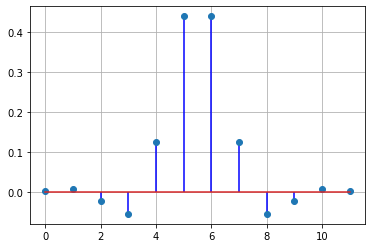

In [3]:
stem(range(len(fir_coeff)), fir_coeff, linefmt='b-', use_line_collection=True)
grid()
show()

## Part 2 - Magnitude and Phase Response
Plotting the magnitude and phase response of the given filter using the $np.signal.freqz$ method.

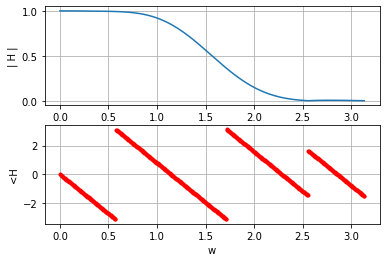

In [4]:
w, H = signal.freqz(fir_coeff)
subplot(212)
ylabel("<H")
xlabel("w")
plot(w, angle(H), 'ro', markersize=3)
grid()
subplot(211)
plot(w, abs(H))
ylabel("| H |")
grid()
show()

## Part 3 - Generating and Plotting given function
Generating the function and plotting it.
$$x(n) = cos(0.2.\pi.n)+cos(0.85.\pi.n)$$

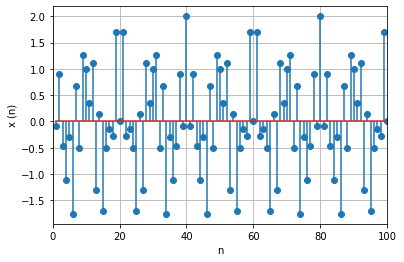

In [5]:
n = array(range(1,2**10+1,1))
x = cos(0.2*pi*n) + cos(0.85*pi*n)
stem(n,x, use_line_collection=True)
xlim([0,100])
xlabel('n'); ylabel('x (n)')
grid()

## Part 4 - Linear Convolution
Convolving the generated function with the given filter using the $np.convolve$ method.

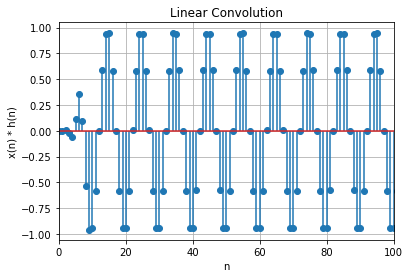

In [6]:
y = convolve(x, fir_coeff)
stem(range(len(y)),y, use_line_collection=True)
xlim([0,100])
xlabel("n"); ylabel("x(n) * h(n)")
title("Linear Convolution")
grid()

## Part 5 - Circular Convolution
Performing circular convolution after padding required zeroes with the filter sequence, but this time by the multiplication of their fourier transforms.

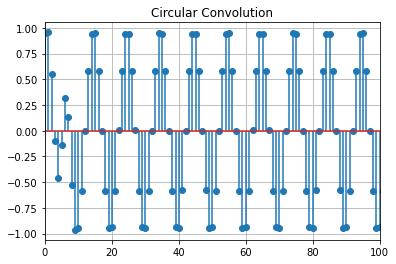

In [7]:
pad_zeros = len(x)-len(fir_coeff)
y = ifft(fft(x)*fft(concatenate((fir_coeff, zeros(pad_zeros)))))
stem(range(len(y)), real(y), use_line_collection=True)
xlim([0,100])
title("Circular Convolution")
grid()

So, we can now observe that the linear and circular convolution are not always equal. This is because the length of the sequence obtained is less than the length of the sequence obtained by linear convolution. So, if we pad enough zeroes to both sequences and perform circular convolution, we would obtain matching results. This is done next.

## Part 6 - Circular Convolution after padding

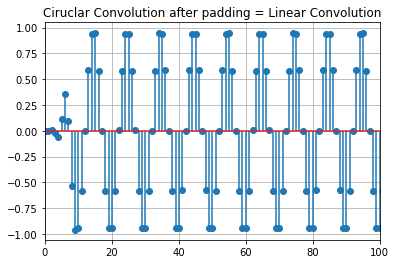

In [8]:
x_pad = len(fir_coeff)-1
f_pad = len(x) - 1
y = ifft(fft(concatenate((x, zeros(x_pad))))*fft(concatenate((fir_coeff, zeros(f_pad)))))
stem(range(len(y)), real(y), use_line_collection=True)
xlim([0,100])
title("Ciruclar Convolution after padding = Linear Convolution")
grid()

As expected, the result of the linear convolution and the above match.

## Part 7 - Zadoff-Chu Sequence

Loading the values of the complex values of the sequence from the file provided. The given sequence is also shifted by 5 using the $np.roll$ method. To verify this, we display the first five of shifted version and the last five of the original and check if they match.

In [9]:
with open("x1.csv", "r") as f:
    chu = list(map(complex, f.read().replace("i","j").split('\n')[:-1]))
chu = array(chu)
chu5shift = roll(chu, 5) 
print(chu[-5:])
print(chu5shift[:5])

[0.9972 -7.4819e-02j 0.99899-4.4918e-02j 0.99975-2.2465e-02j
 0.99997-7.4888e-03j 1.     +1.6657e-13j]
[0.9972 -7.4819e-02j 0.99899-4.4918e-02j 0.99975-2.2465e-02j
 0.99997-7.4888e-03j 1.     +1.6657e-13j]


Our goal is to very the following property : *Correlation of ZadoffChu sequence with the delayed version of itself will give
a peak at that delay.* To calculation the correlation, we calculate $conv(a(n),b(-n))$, which in the frequency domain is $A(j\omega).B(j\omega)^*$. Using this, we calculate the correlation between the given sequence and its 5-shifted version.

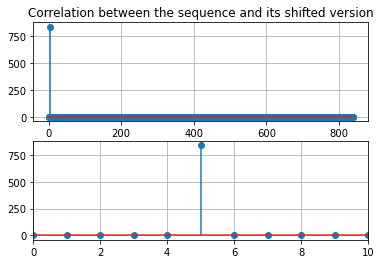

In [10]:
cor = ifft(fft(chu5shift)*conj(fft(chu)))
subplot(211)
title("Correlation between the sequence and its shifted version")
stem(range(len(cor)), abs(cor), use_line_collection=True)
grid()
subplot(212)
stem(range(len(cor)), abs(cor), use_line_collection=True)
xlim([0,10])
grid()

As expected, we could see that exactly at the delay (5 in our case), there is a peak, and is almost 0 elsewhere.

# Conclusion
- We found that linear convolution can be done with the help of circular convolution through FFT after appropriate padding of zeroes. This is computationally efficient as linear convolution through summation takes more time. 
- We also verified that the correlation of the Zadoff Chu sequence with a shifted version of itself gives a peak only at the value of shift.